# Plotting performance per MD/MC iteration
Notebook exploring erratic timings of MD/MC iterations of `SaltSwap` code. Initial results were suggestive of a memory leak in the code, possibly due to a bug in the NCMC code. Subsequent tests implied the slowdown was due to usage of the cluster, namely sharing GPUs or previous GPU jobs that hadn't shut down properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## GPU NCMC, initial run
Loading GPU simulation data from Hal, where each iteraction has been timed with the `datetime` module. The script used was `NCMC_hal/run_ncmcTest.py`, and the command below was called.

`run_ncmcTest.py -i waterbox.pdb -c 2000 --nkernals 1000 --nverlet 1 --gpu -o ncmc_more.pdb -d ncmc_more.txt -s 25000`

Percent variation = 29.944962


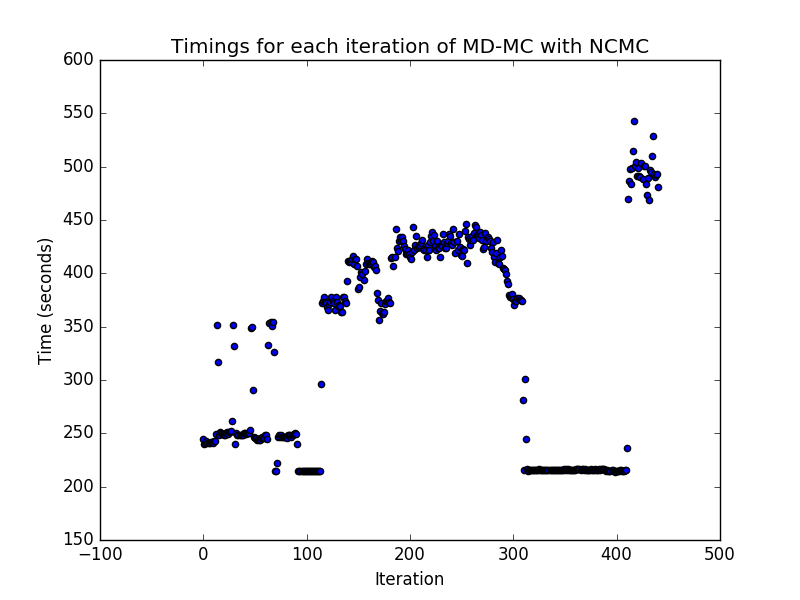

In [2]:
file = open("NCMC_hal/hal_gpu_ncmc.txt").readlines()
time = []
for i in range(3,len(file)):
    time.append(int(file[i][25:28].strip()))
    
time=np.array(time)
iteration = np.arange(time.shape[0])

plt.scatter(x=iteration,y=time)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Timings for each iteration of MD-MC on GPU with NCMC")
plt.savefig("IterationTime_gpu_NCMC.png", format='png')
print "Percent variation = {0:2f}".format(100*np.std(time)/np.mean(time))
Image("IterationTime_gpu_NCMC.png")

The above was suggestive of a problem with the `SaltSwap` code. More recent results, shown below indicate this was a fluke.

## GPU NCMC, second run
`python2.7 run_ncmc.py -i waterbox.pdb --gpu -o trash.pdb -d data_kernals100_profiled.txt -s 500 -c 200 --nkernals 100 --profile`

The flag `--profile` indicates that each iteration was profiled. In `NCMC_hal`, 3 of the 200 profiles that were made have been saved. They show nothing of interest. The script `run_ncmc.py` can also be found in `NCMC_hal`.

Percent variation = 2.032734


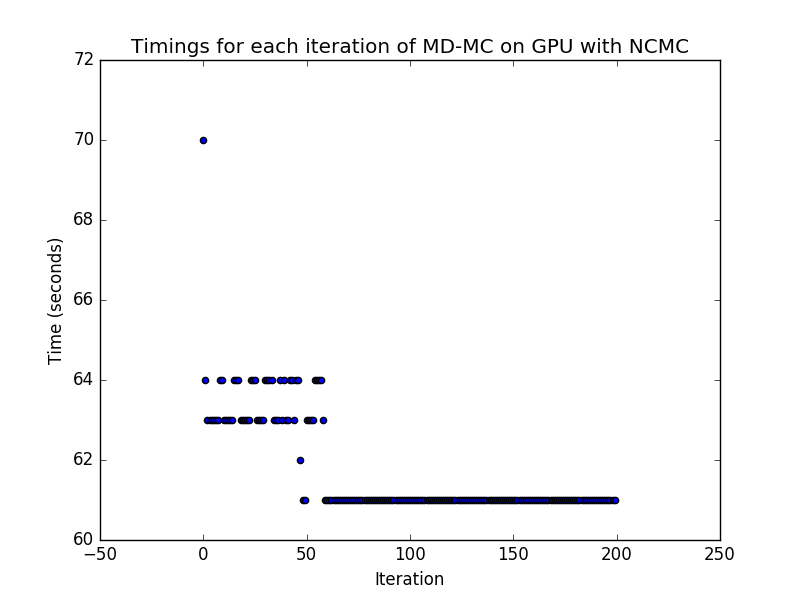

In [17]:
file = open("NCMC_hal/data_kernals100_profiled.txt").readlines()
time = []
for i in range(3,len(file)):
    time.append(int(file[i][25:28].strip()))

time=np.array(time)
iteration = np.arange(time.shape[0])

plt.clf()
plt.scatter(x=iteration,y=time)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Timings for each iteration of MD-MC on GPU with NCMC")
plt.savefig("IterationTime_gpu_NCMC2.png", format='png')
print "Percent variation = {0:2f}".format(100*np.std(time)/np.mean(time))
Image("IterationTime_gpu_NCMC2.png")

Percent variation = 3.051307


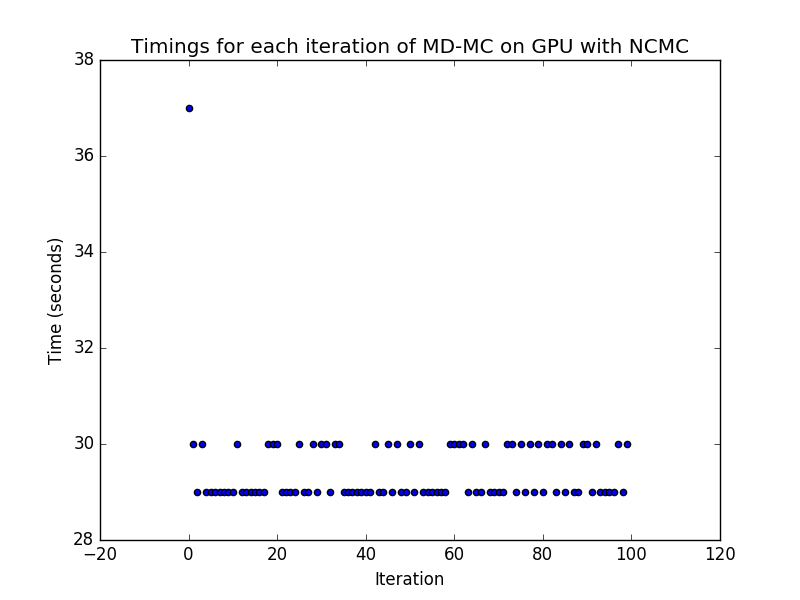

In [18]:
file = open("NCMC_hal/data_kernals1000_steps5000.txt").readlines()
time = []
for i in range(3,len(file)):
    time.append(int(file[i][25:28].strip()))

time=np.array(time)
iteration = np.arange(time.shape[0])

plt.clf()
plt.scatter(x=iteration,y=time)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Timings for each iteration of MD-MC on GPU with NCMC")
plt.savefig("IterationTime_gpu_NCMC2.png", format='png')
print "Percent variation = {0:2f}".format(100*np.std(time)/np.mean(time))
Image("IterationTime_gpu_NCMC2.png")

Looks fine. More tests were run below, also suggest there's no problem with the script.

## GPU Instantaneous swiching (No NCMC)

Percent variation = 13.418360


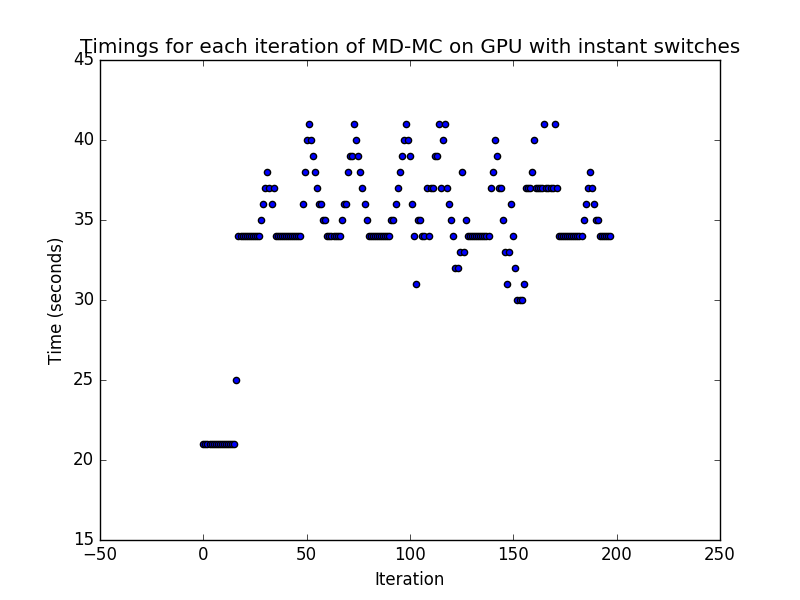

In [19]:
file = open("InstantSwitches/instsw.txt").readlines()
time = []
for i in range(3,len(file)):
    time.append(int(file[i][25:28].strip()))
    
time=np.array(time)
iteration = np.arange(time.shape[0])
plt.clf()
plt.scatter(x=iteration,y=time)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Timings for each iteration of MD-MC on GPU with instant switches")
plt.savefig("IterationTime_gpu_instant.png", format='png')
print "Percent variation = {0:2f}".format(100*np.std(time)/np.mean(time))
Image("IterationTime_gpu_instant.png")

# Local CPU tests
SaltSwap simulations that have been run on my iMac with `rough-code/run_ncmc.py`.

Niterations =  200, Nsteps =   250000, Nattemps = 100, Dchem = -650.0, Nkernals =  1000, Nverlet =   1

Percent variation = 18.144507


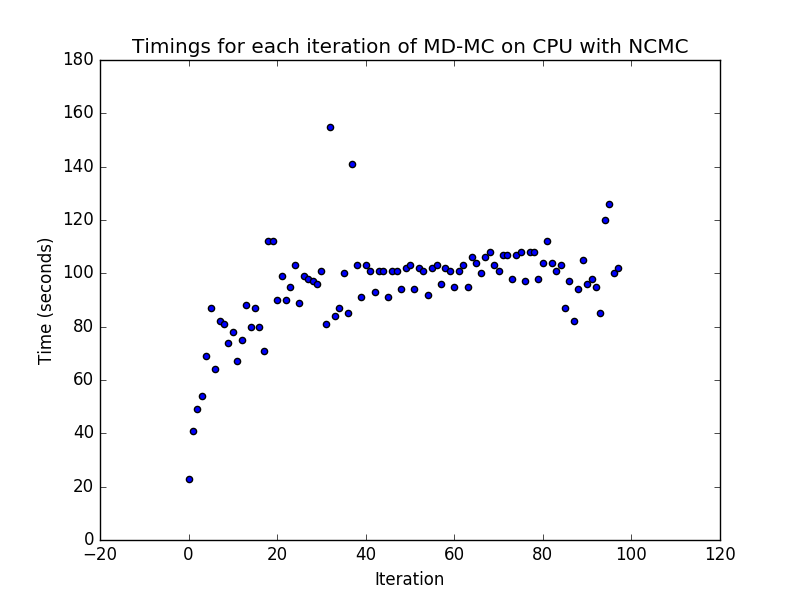

In [20]:
file = open("NCMC_local/data_profiled_nosleep.txt").readlines()
time = []
for i in range(4,len(file)):
    time.append(int(file[i][25:28].strip()))
    
time=np.array(time)
iteration = np.arange(time.shape[0])
plt.clf()
plt.scatter(x=iteration,y=time)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Timings for each iteration of MD-MC on CPU with NCMC")
plt.savefig("IterationTime_cpu_ncmc.png", format='png')
print "Percent variation = {0:2f}".format(100*np.std(time)/np.mean(time))
Image("IterationTime_cpu_ncmc.png")

Niterations =  200, Nsteps =   25000, Nattemps = 100, Dchem = -650.0, Nkernals =  1000, Nverlet =   1

Percent variation = 8.186135


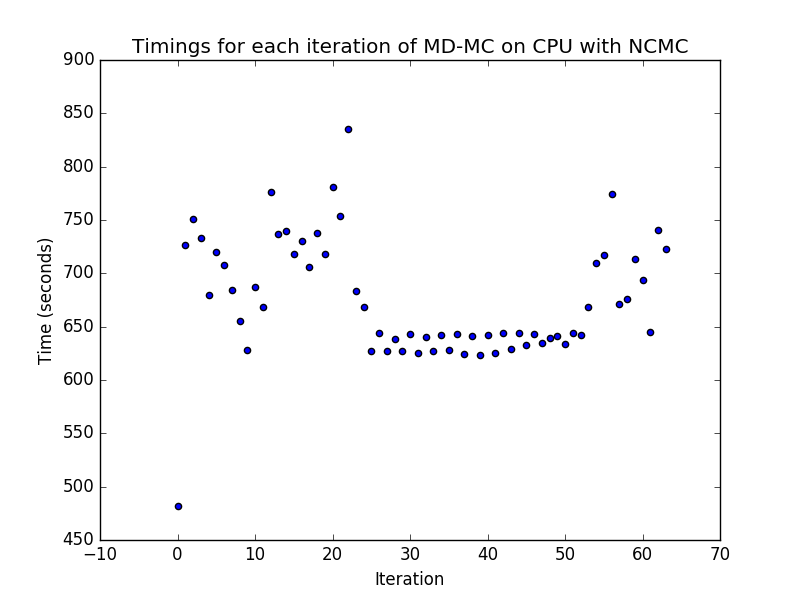

In [21]:
file = open("NCMC_local/data_nosleep.txt").readlines()
time = []
for i in range(4,len(file)):
    time.append(int(file[i][25:28].strip()))
    
time=np.array(time)
iteration = np.arange(time.shape[0])
plt.clf()
plt.scatter(x=iteration,y=time)
plt.xlabel("Iteration")
plt.ylabel("Time (seconds)")
plt.title("Timings for each iteration of MD-MC on CPU with NCMC")
plt.savefig("IterationTime_cpu_ncmc2.png", format='png')
print "Percent variation = {0:2f}".format(100*np.std(time)/np.mean(time))
Image("IterationTime_cpu_ncmc2.png")